In [7]:
from math import log, log10, exp, e, pow, sqrt
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
import pandas as pd

In [8]:
#Height of the building for One Manhattan is 258,2 m
# Number of floors are 72
Vb=33.9
height_total =258.2
storey_height = 4 # height of each floor 
air_density = 1.2 # airdensity in kg/m3
height = np.arange(0, height_total, storey_height)
z=np.arange(16, height_total, storey_height)

In [9]:
#CALCULATION FOR WIND TURBULENCE[Iv] for Z min 16 m and z0=1,05
#Z_min is 10m for euro code and 16 m for german annex
#Kl is 1

z_min_german=16
z_max=258
kr=1
kl=1 
z0=1.05
c0=1

z_list_g=[]
Iv_List_g=[]
Qp_List_g=[]

for z in range(z_min_german,z_max,storey_height):
    Iv=(kl/c0* log (z/z0))
    cr=kr*log(z/z0)
    vm=cr*c0*Vb   
    Qp=((1+(7*Iv*z))*0.5*air_density*(vm*vm*z))
    z_list_g.append(z)
    Iv_List_g.append(Iv)
    Qp_List_g.append(Qp)

In [10]:
#CALCULATION FOR WIND TURBULENCE[Iv] for Z min 10 m
#Z_min is 10m for euro code and 16 m for german annex
#Kl and Kr is taken as 1

z_min_euro=10
z_max=258
kr=1
kl=1 
z0=1
c0=1

z_list_e=[]
Iv_List_e=[]
Qp_List_e=[]

for z in range(z_min_euro,z_max,storey_height):
    Iv=(kl/c0* log (z/z0))
    cr=kr*log(z/z0)
    vm=cr*c0*Vb   
    Qp=((1+(7*Iv*z))*0.5*air_density*(vm*vm*z))
    z_list_e.append(z)
    Iv_List_e.append(Iv)
    Qp_List_e.append(Qp)

In [11]:
d_g={'Spliced Height':z_list_g,'Iv':Iv_List_g,'Qp':Qp_List_g}
d_e={'Spliced Height':z_list_e,'Iv':Iv_List_e,'Qp':Qp_List_e}
df_g = pd.DataFrame(d_g)
df_e = pd.DataFrame(d_e)
print(df_g)
print(df_e)

# Uncomment this if you want to download the spreadhsheet
# df_g.to_csv("plotasper_germanAnnex.csv")   
# df_e.to_csv("plotasper_euroAnnex.csv")


    Spliced Height        Iv            Qp
0               16  2.723799  2.505157e+07
1               20  2.946942  4.953075e+07
2               24  3.129264  8.535382e+07
3               28  3.283414  1.341579e+08
4               32  3.416946  1.974376e+08
..             ...       ...           ...
56             240  5.431849  4.456170e+10
57             244  5.448378  4.648113e+10
58             248  5.464639  4.844870e+10
59             252  5.480639  5.046477e+10
60             256  5.496387  5.252967e+10

[61 rows x 3 columns]
    Spliced Height        Iv            Qp
0               10  2.302585  5.929006e+06
1               14  2.639057  1.745530e+07
2               18  2.890372  3.786567e+07
3               22  3.091042  6.913856e+07
4               26  3.258097  1.130366e+08
..             ...       ...           ...
57             238  5.472271  4.480773e+10
58             242  5.488938  4.675101e+10
59             246  5.505332  4.874332e+10
60             250  5.521461  5

<AxesSubplot:xlabel='Qp'>

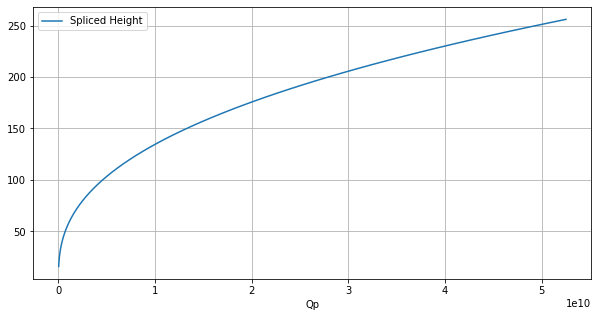

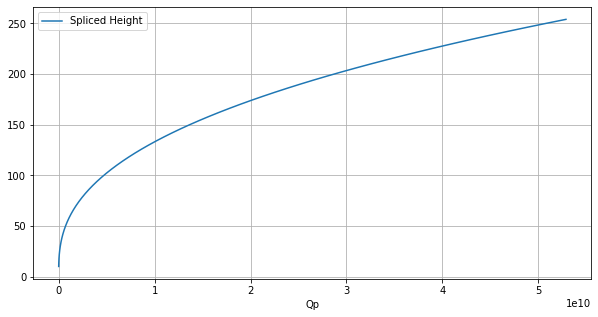

In [12]:
#Lets plot

df_g.plot(x='Qp', y='Spliced Height' ,figsize=(10,5), grid=True)
df_e.plot(x='Qp', y='Spliced Height' ,figsize=(10,5), grid=True)